In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df = pd.read_csv("parkinsons.csv", low_memory=False)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(195, 24)

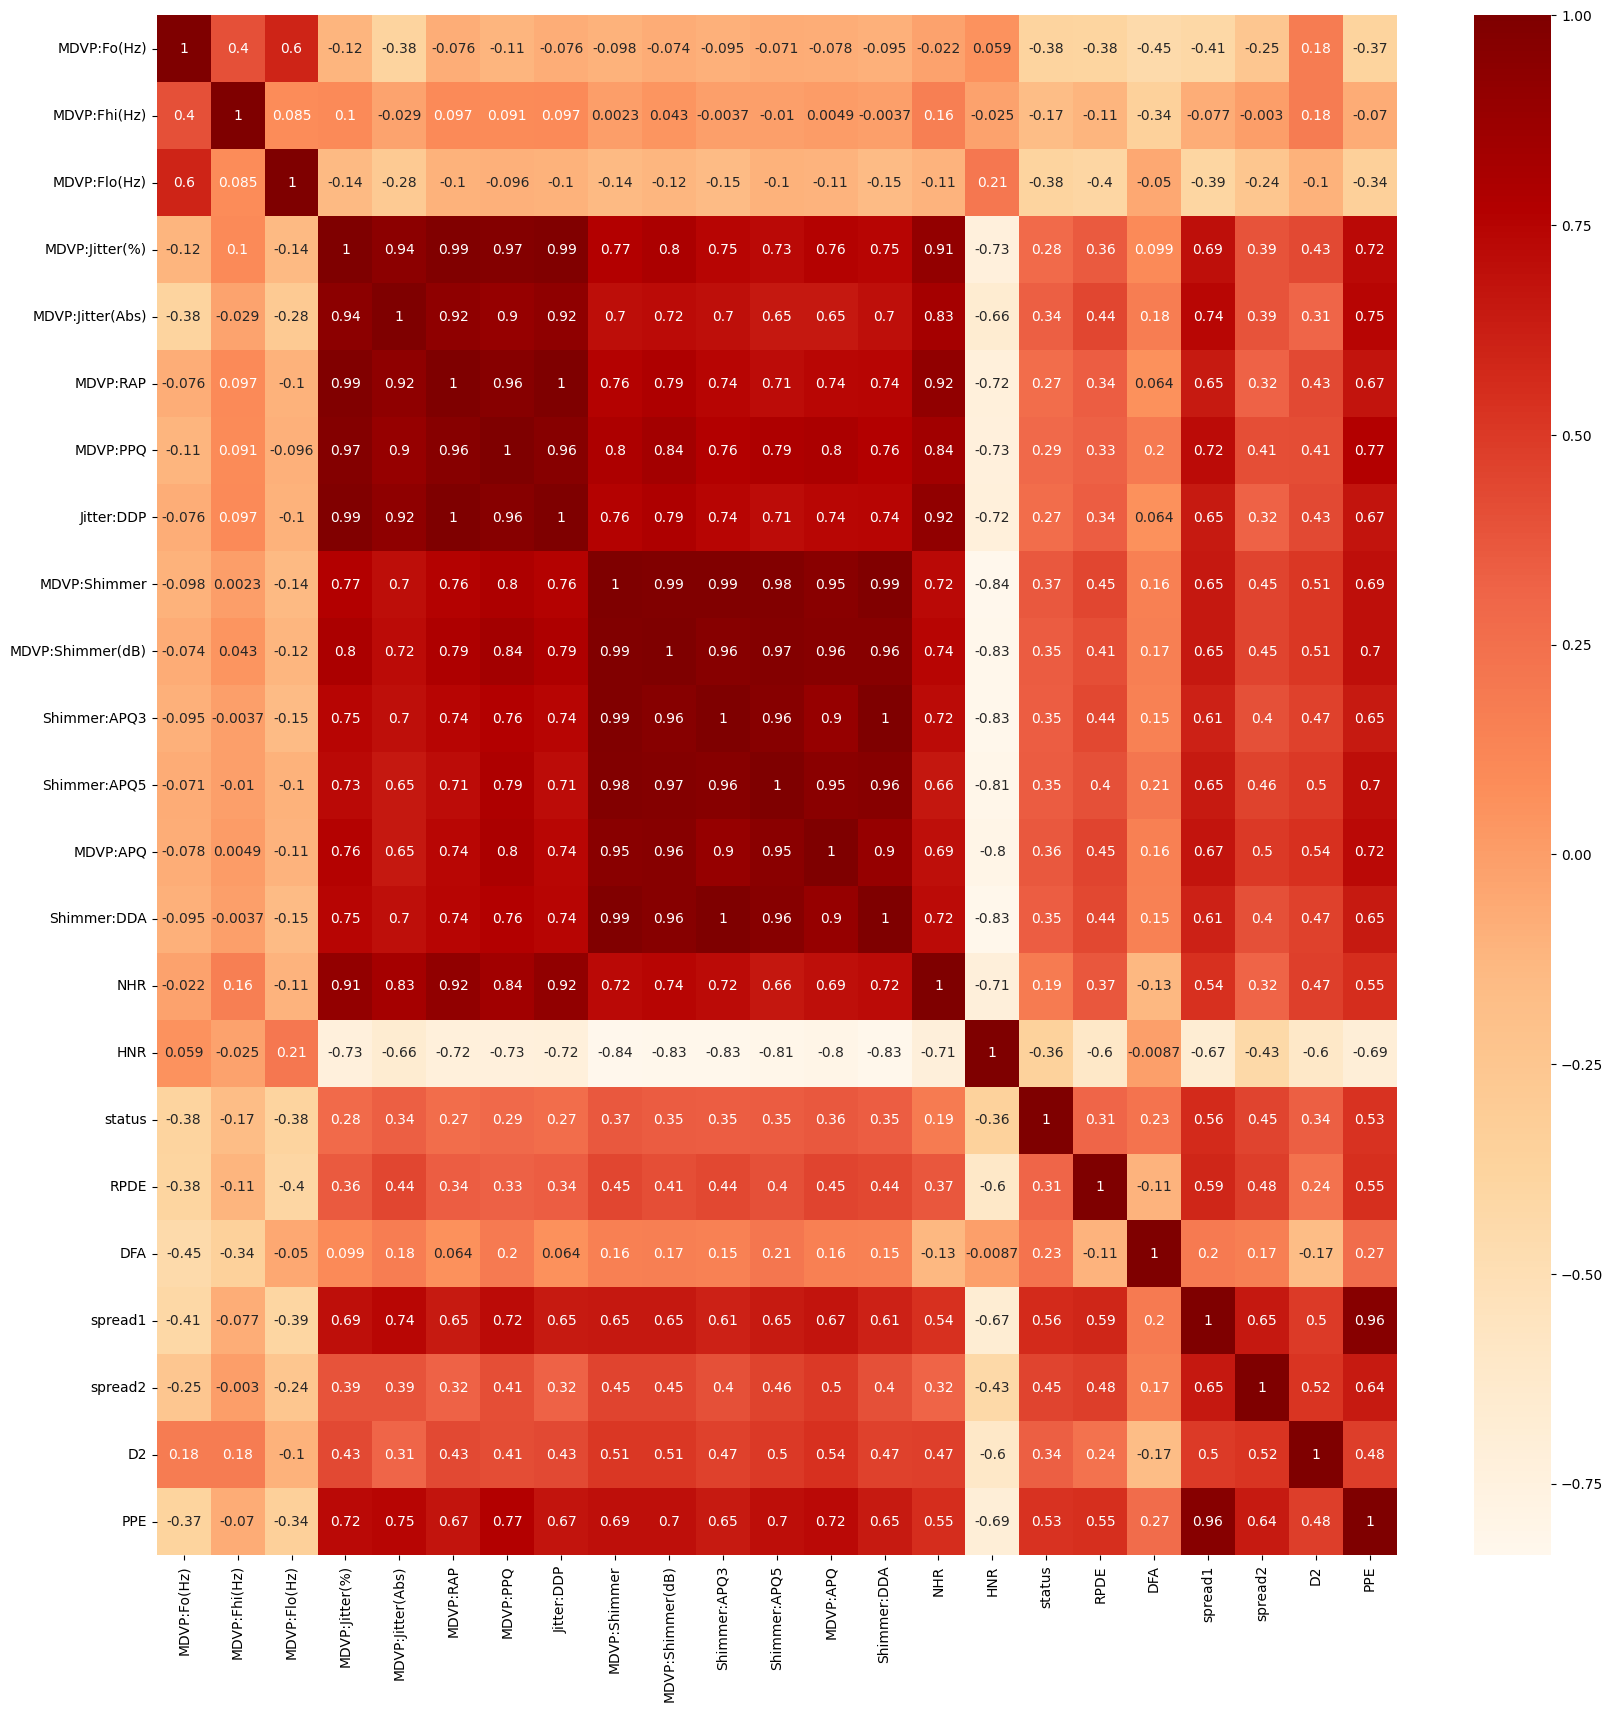

In [8]:
correl=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

In [9]:
def correlation(dataset, cor):
    df1 = dataset.copy()
    col_corr = set()  # For storing unique value
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > cor: # absolute values to handle positive and negative correlations
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    df1.drop(col_corr,axis = 1,inplace = True)
    return df1

In [10]:
df2 = correlation(df, 0.5)
df2.shape

(195, 6)

# Logistic Regression

In [12]:
y = df2['status']
X = df2.drop(columns=['status', 'name'])

In [13]:
# Splitting to train and test data(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 0)

In [14]:
# To scale the values
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

In [15]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LogisticRegression(),
X = X_train,
y = y_train)

In [16]:
classifier = LogisticRegression(random_state = 0)

In [17]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
y_pred_lr = classifier.predict(X_test)

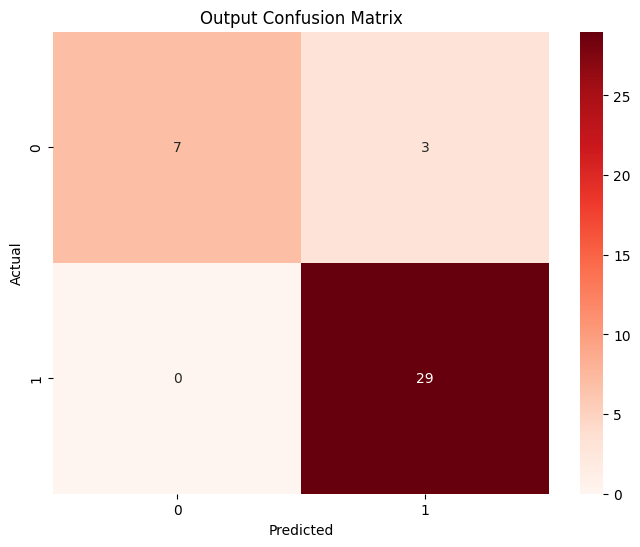

In [19]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")
plt.show()

In [20]:
accuracy_score(y_test, y_pred_lr)

0.9230769230769231

In [21]:
tp = cm[0][0]
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
acc = (tp + tn) / (tp + fp + tn + fn)
acc

0.9230769230769231

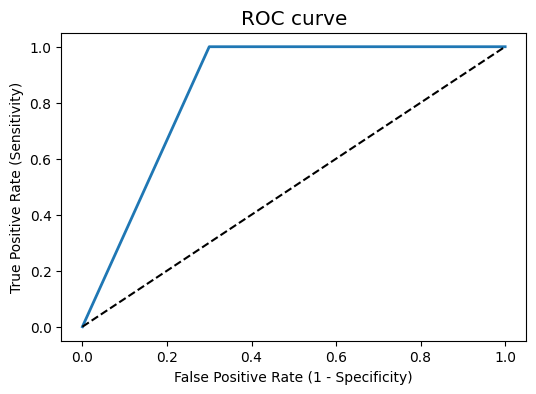

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [23]:
ROC_AUC_LR = roc_auc_score(y_test, y_pred_lr)
ROC_AUC_LR

0.85

In [24]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=2)  
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [27]:
y_pred_knn = knn.predict(X_test)

In [28]:
knn.score(X_test, y_test)

0.8717948717948718

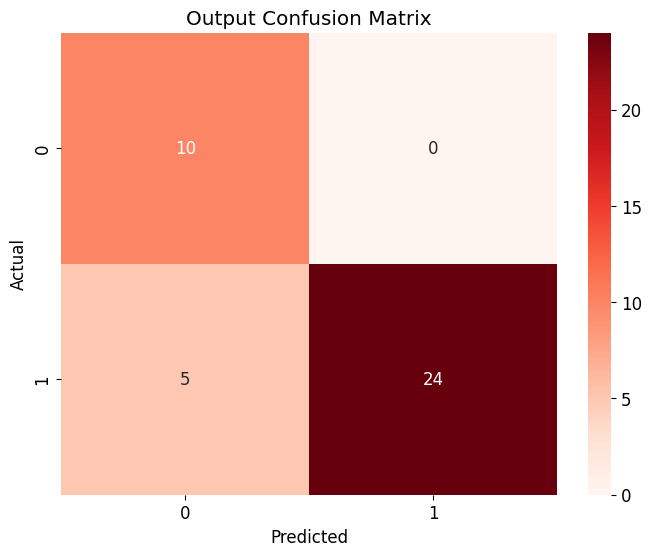

In [29]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm_knn,annot=True,cmap="Reds")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")
plt.show()

The described situation with high AUC and low accuracy can occur when your classifier achieves the good performance on the positive class (high AUC), at the cost of a high false negatives rate (or a low number of true negatives).

In [30]:
accuracy_score(y_test, y_pred_knn)

0.8717948717948718

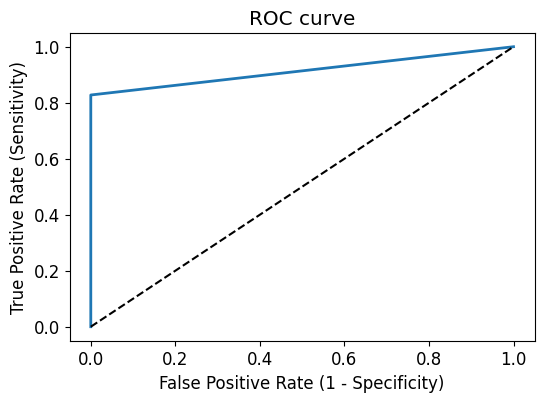

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [32]:
ROC_AUC_KNN = roc_auc_score(y_test, y_pred_knn)
ROC_AUC_KNN

0.9137931034482758

# SVM

In [33]:
# import SVC classifier
from sklearn.svm import SVC

In [34]:
svc=SVC(kernel = 'linear') 
# fit classifier to training set
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [35]:
# make predictions on test set
y_pred_svm=svc.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred_svm)

0.9230769230769231

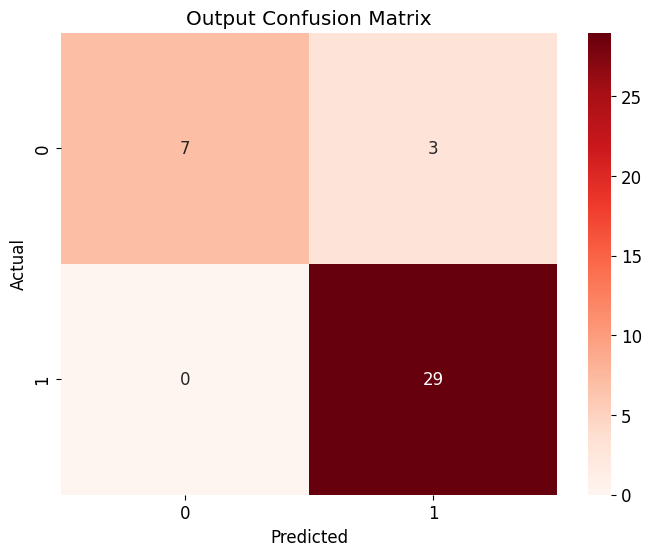

In [37]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm_svm,annot=True,cmap="Reds")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")
plt.show()

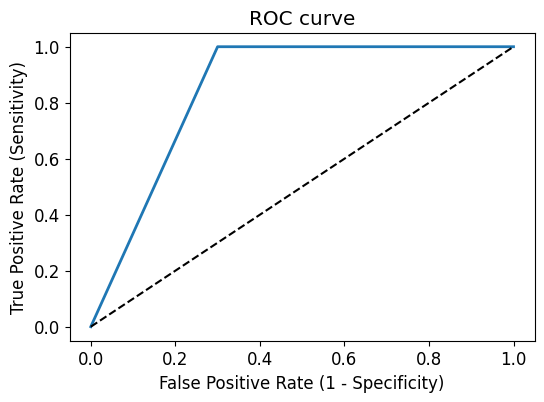

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [39]:
ROC_AUC_SVM = roc_auc_score(y_test, y_pred_svm)
ROC_AUC_SVM

0.85

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators = 100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
# feature_importance = rfc.feature_importances_
# importance_df = pd.DataFrame({'features': X_train.columns,
#                               'importance': feature_importance})
# importance_df.sort_values(by='importance', ascending=False, inplace=True)
# importance_df

In [43]:
y_pred_rfc = rfc.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred_rfc)

0.9230769230769231

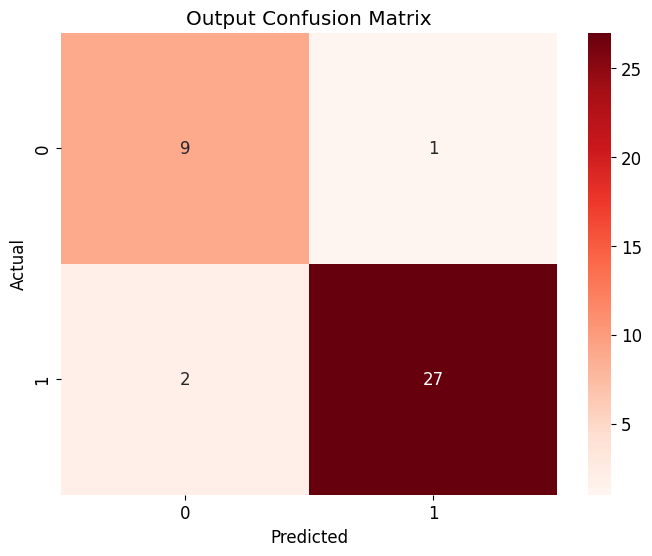

In [45]:
cm_rf = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm_rf,annot=True,cmap="Reds")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")
plt.show()